In [80]:
 import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder
import joblib

In [4]:
file1=pd.read_csv('customer_data.csv')

In [10]:
print(file1.head())

  Customer_Id  Gender  Age Married       State  Number_of_referrals  \
0    CUST0001    Male   25     Yes       Texas                    3   
1    CUST0002    Male   61      No     Florida                    5   
2    CUST0003  Female   44      No       Texas                    1   
3    CUST0004  Female   42     Yes  California                    2   
4    CUST0005  Female   63      No  California                    3   

   Tenure in months Value deal Phone service    Multiple_lines  ...  \
0                34        Yes           Yes  No phone service  ...   
1                15         No            No               Yes  ...   
2                16        Yes           Yes  No phone service  ...   
3                72        Yes            No                No  ...   
4                37        Yes            No  No phone service  ...   

     Payment method Monthly charge Total charges Total refunds  \
0       Credit card          79.80       1724.36         59.74   
1      Mailed 

In [11]:
# data preprocessing
file1 = file1.drop(['Customer_Id', 'Churn category', 'Churn reason'], axis=1)

In [14]:
columns_to_encode = [
    'Gender', 'Married', 'State', 'Value deal', 'Phone service', 'Multiple_lines',
    'Internet service', 'Internet type', 'Online security', 'Online backup',
    'Device protection plan', 'Premium support', 'Streaming TV', 'Streaming movies',
    'Streaming music', 'Unlimited data', 'Contract', 'Paperless billing',
    'Payment method'
]

# Encode categorical variables except the target variable
label_encoders = {}
for column in columns_to_encode:
    label_encoders[column] = LabelEncoder()
    file1[column] = label_encoders[column].fit_transform(file1[column])

# Manually encode the target variable 'Customer_Status'
file1['Customer status'] = file1['Customer status'].map({'Stayed': 0, 'Churned': 1})
# Split data into features and target
X = file1.drop('Customer status', axis=1)
y = file1['Customer status']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [17]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf_model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [18]:
y_pred = rf_model.predict(X_test)

In [19]:
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Confusion Matrix:
[[33 25]
 [25 17]]

Classification Report:
              precision    recall  f1-score   support

           0       0.57      0.57      0.57        58
           1       0.40      0.40      0.40        42

    accuracy                           0.50       100
   macro avg       0.49      0.49      0.49       100
weighted avg       0.50      0.50      0.50       100



In [21]:
importances = rf_model.feature_importances_
indices = np.argsort(importances)[::-1]


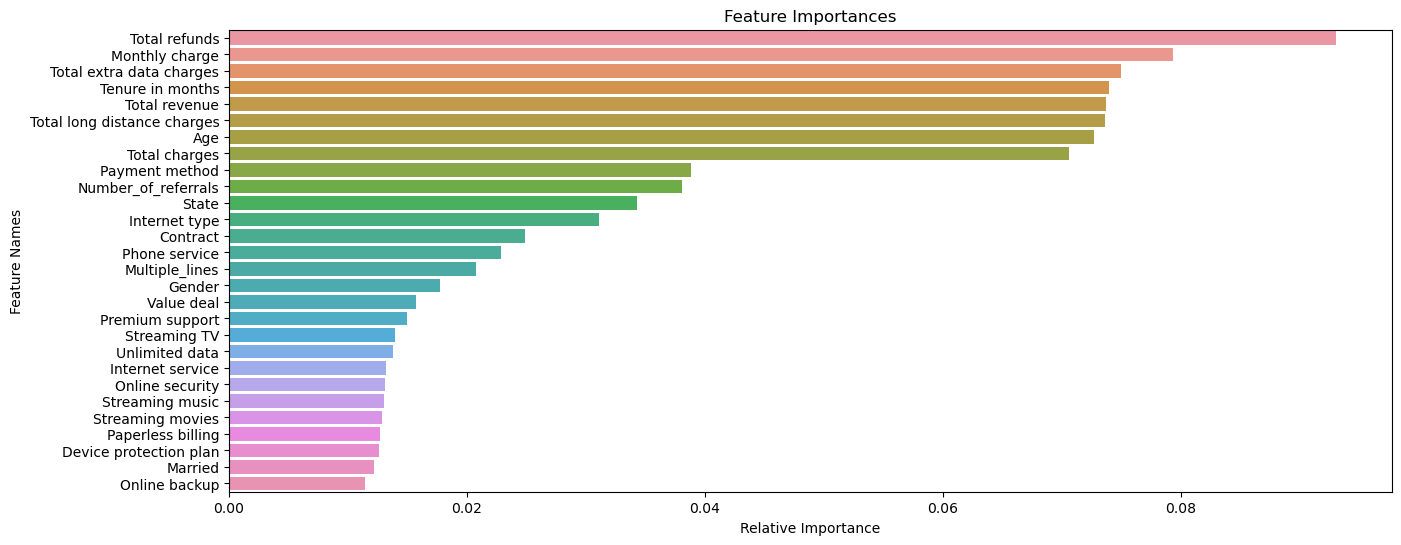

In [23]:
plt.figure(figsize=(15, 6))
sns.barplot(x=importances[indices], y=X.columns[indices])
plt.title('Feature Importances')
plt.xlabel('Relative Importance')
plt.ylabel('Feature Names')
plt.show()


In [67]:
file2=pd.read_csv('joined_customer_data.csv')

In [68]:
print(file2.dtypes)

Customer_Id                     object
Gender                          object
Age                              int64
Married                         object
State                           object
Number_of_referrals              int64
Tenure in months                 int64
Value deal                      object
Phone service                   object
Multiple_lines                  object
Internet service                object
Internet type                   object
Online security                 object
Online backup                   object
Device protection plan          object
Premium support                 object
Streaming TV                    object
Streaming movies                object
Streaming music                 object
Unlimited data                  object
Contract                        object
Paperless billing               object
Payment method                  object
Monthly charge                 float64
Total charges                  float64
Total refunds            

In [69]:
print(file2.head())

  Customer_Id  Gender  Age Married     State  Number_of_referrals  \
0   CUSTJ0001    Male   32     Yes     Texas                    1   
1   CUSTJ0002  Female   21      No  Illinois                    4   
2   CUSTJ0003  Female   40      No     Texas                    1   
3   CUSTJ0004    Male   51     Yes   Florida                    2   
4   CUSTJ0005    Male   61      No     Texas                    2   

   Tenure in months Value deal Phone service    Multiple_lines  ...  \
0                32         No            No  No phone service  ...   
1                41         No           Yes                No  ...   
2                61        Yes           Yes                No  ...   
3                66         No            No  No phone service  ...   
4                10        Yes           Yes                No  ...   

  Payment method Monthly charge Total charges Total refunds  \
0   Mailed check          54.42       8835.82        156.30   
1  Bank transfer          54.09 

In [84]:
new_data = file2.drop(['Customer_Id', 'Churn category', 'Churn reason'], axis=1)

In [85]:
new_data.dtypes

Gender                          object
Age                              int64
Married                         object
State                           object
Number_of_referrals              int64
Tenure in months                 int64
Value deal                      object
Phone service                   object
Multiple_lines                  object
Internet service                object
Internet type                   object
Online security                 object
Online backup                   object
Device protection plan          object
Premium support                 object
Streaming TV                    object
Streaming movies                object
Streaming music                 object
Unlimited data                  object
Contract                        object
Paperless billing               object
Payment method                  object
Monthly charge                 float64
Total charges                  float64
Total refunds                  float64
Total extra data charges 

In [86]:
label_encoders={}
for column in new_data.select_dtypes(include=['object']).columns:
    new_data[column] = new_data[column].astype(str)
    le=LabelEncoder()
    new_data[column]=le.fit_transform(new_data[column])
    label_encoders[column]=le

# Make predictions
new_predictions = rf_model.predict(new_data)

# Add predictions to the original DataFrame
original_data['Customer_Status_Predicted'] = new_predictions

# Filter the DataFrame to include only records predicted as "Churned"
original_data = file2[file2['Customer_Status_Predicted'] == 1]

# Save the results
original_data.to_csv(r"C:\yourpath\Predictions.csv", index=False)


ValueError: The feature names should match those that were passed during fit.
Feature names unseen at fit time:
- Customer status


In [87]:
a=1
b=5
c='3'
print(a+b+c)

TypeError: unsupported operand type(s) for +: 'int' and 'str'